In [1]:
# Cell 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set pandas to display all columns to avoid truncation during analysis
pd.set_option('display.max_columns', None)

# Set a consistent style for visualizations
sns.set_style('whitegrid')

print("Libraries loaded successfully.")

Libraries loaded successfully.


In [2]:
# Load the Dataset
# The path assumes the notebook is running from the project root directory.
DATA_PATH = '../data/raw/data.csv'
df = pd.read_csv(DATA_PATH)

print(f"Dataframe successfully loaded from: {DATA_PATH}")

Dataframe successfully loaded from: ../data/raw/data.csv


In [3]:
#  Data Overview (Structure, Rows, Columns, Data Types)
print("--- Data Head (First 5 Rows) ---")
print(df.head())

print("\n--- Data Structure and Dtypes (df.info()) ---")
df.info()

print(f"\nNumber of Rows (Transactions): {len(df)}")
print(f"Number of Columns (Features): {len(df.columns)}")

--- Data Head (First 5 Rows) ---
         TransactionId         BatchId       AccountId       SubscriptionId  \
0  TransactionId_76871   BatchId_36123  AccountId_3957   SubscriptionId_887   
1  TransactionId_73770   BatchId_15642  AccountId_4841  SubscriptionId_3829   
2  TransactionId_26203   BatchId_53941  AccountId_4229   SubscriptionId_222   
3    TransactionId_380  BatchId_102363   AccountId_648  SubscriptionId_2185   
4  TransactionId_28195   BatchId_38780  AccountId_4841  SubscriptionId_3829   

        CustomerId CurrencyCode  CountryCode    ProviderId     ProductId  \
0  CustomerId_4406          UGX          256  ProviderId_6  ProductId_10   
1  CustomerId_4406          UGX          256  ProviderId_4   ProductId_6   
2  CustomerId_4683          UGX          256  ProviderId_6   ProductId_1   
3   CustomerId_988          UGX          256  ProviderId_1  ProductId_21   
4   CustomerId_988          UGX          256  ProviderId_4   ProductId_6   

      ProductCategory    ChannelId 

In [4]:
# Summary Statistics for Numerical Columns
print("--- Summary Statistics (Numerical Features) ---")
# Use include='all' to get statistics for object types as well, 
# but focus on numerical columns for central tendency/dispersion.
# We explicitly select key numerical features for cleaner output.
numerical_cols = ['Amount', 'Value', 'PricingStrategy', 'FraudResult']
print(df[numerical_cols].describe().T)

print("\n--- Summary Statistics (Categorical/Object Features) ---")
# Get counts and unique values for categorical features
print(df.select_dtypes(include=['object']).describe().T)

--- Summary Statistics (Numerical Features) ---
                   count         mean            std        min    25%  \
Amount           95662.0  6717.846433  123306.797164 -1000000.0  -50.0   
Value            95662.0  9900.583941  123122.087776        2.0  275.0   
PricingStrategy  95662.0     2.255974       0.732924        0.0    2.0   
FraudResult      95662.0     0.002018       0.044872        0.0    0.0   

                    50%     75%        max  
Amount           1000.0  2800.0  9880000.0  
Value            1000.0  5000.0  9880000.0  
PricingStrategy     2.0     2.0        4.0  
FraudResult         0.0     0.0        1.0  

--- Summary Statistics (Categorical/Object Features) ---
                      count unique                   top   freq
TransactionId         95662  95662   TransactionId_76871      1
BatchId               95662  94809         BatchId_67019     28
AccountId             95662   3633        AccountId_4841  30893
SubscriptionId        95662   3627   Subsc

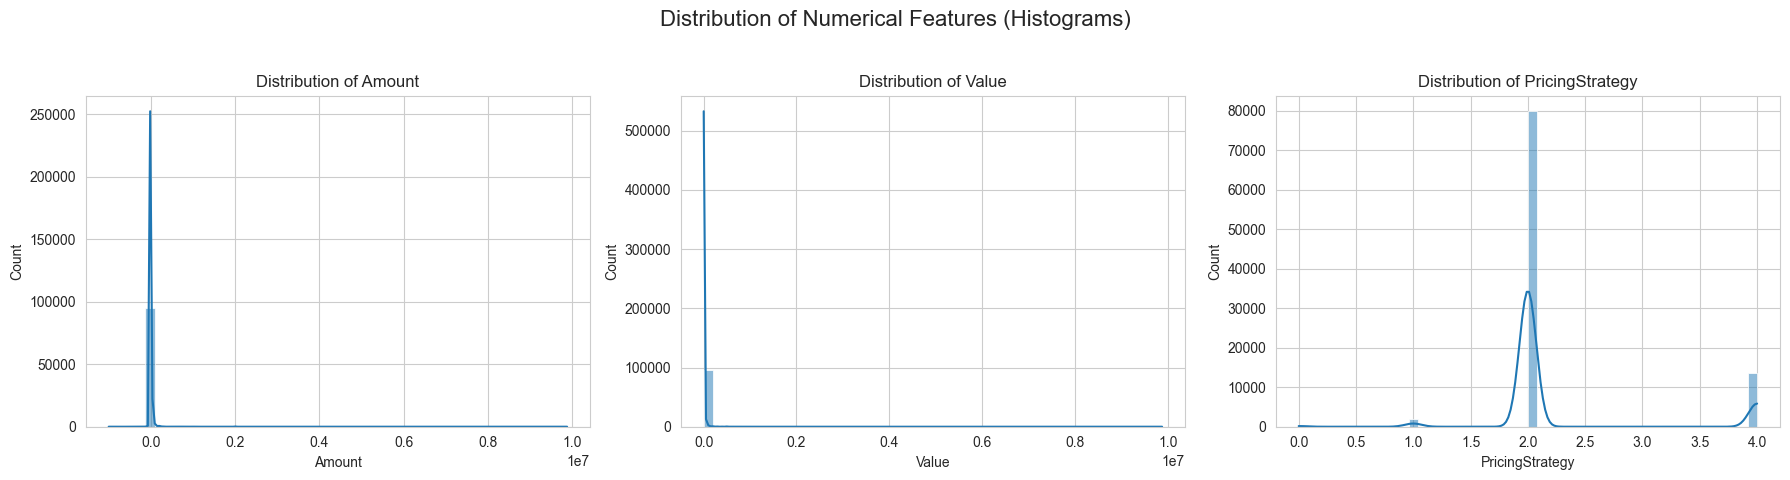

In [6]:
# Cell 5: Visualize Distribution (Histograms)
numerical_features = ['Amount', 'Value', 'PricingStrategy']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Distribution of Numerical Features (Histograms)', fontsize=16)

for i, col in enumerate(numerical_features):
    # Plot the histogram
    sns.histplot(df[col], kde=True, ax=axes[i], bins=50)
    axes[i].set_title(f'Distribution of {col}', fontsize=12)
    
    # Due to extreme skew/outliers, the first plots will be condensed.
    # The box plots later will show the full range.

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

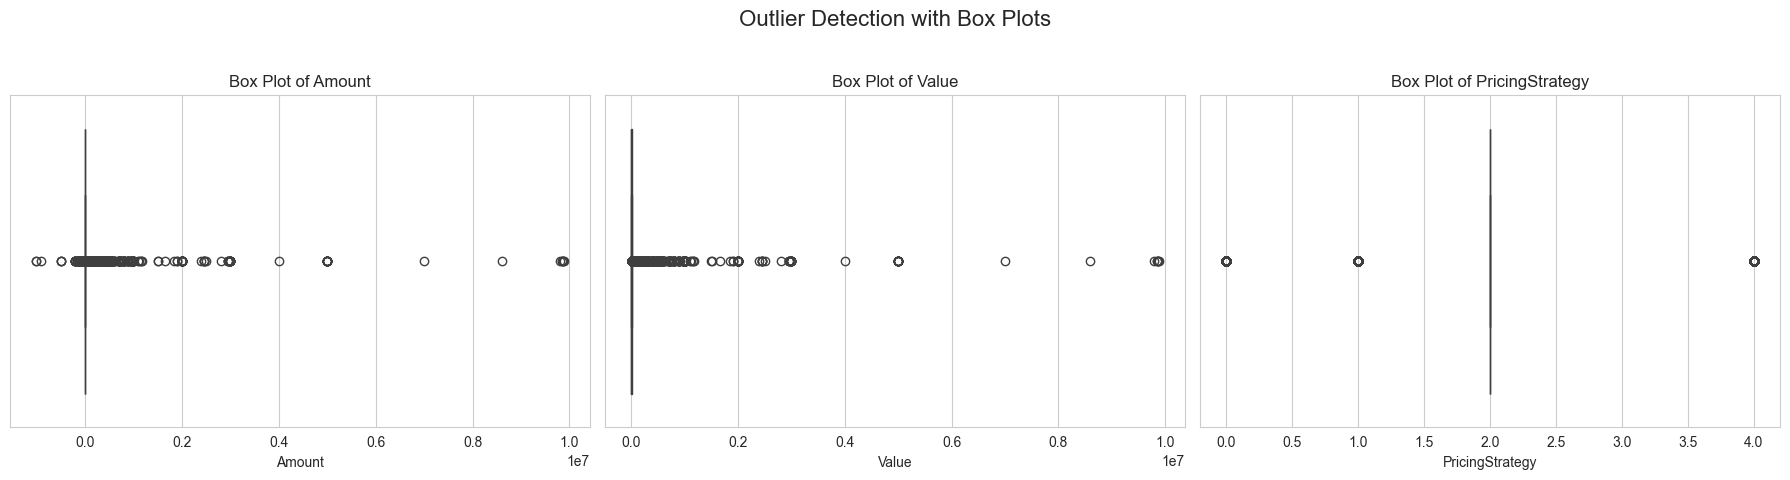

In [7]:
# Cell 6: Outlier Detection (Box Plots)
numerical_features = ['Amount', 'Value', 'PricingStrategy']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Outlier Detection with Box Plots', fontsize=16)

for i, col in enumerate(numerical_features):
    # Create the box plot
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}', fontsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

C:\Users\Mer\AppData\Local\Temp\ipykernel_2240\3884158088.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['ProductCategory'], order=df['ProductCategory'].value_counts().index, ax=axes[0], palette='viridis')
C:\Users\Mer\AppData\Local\Temp\ipykernel_2240\3884158088.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['ChannelId'], order=df['ChannelId'].value_counts().index, ax=axes[1], palette='plasma')


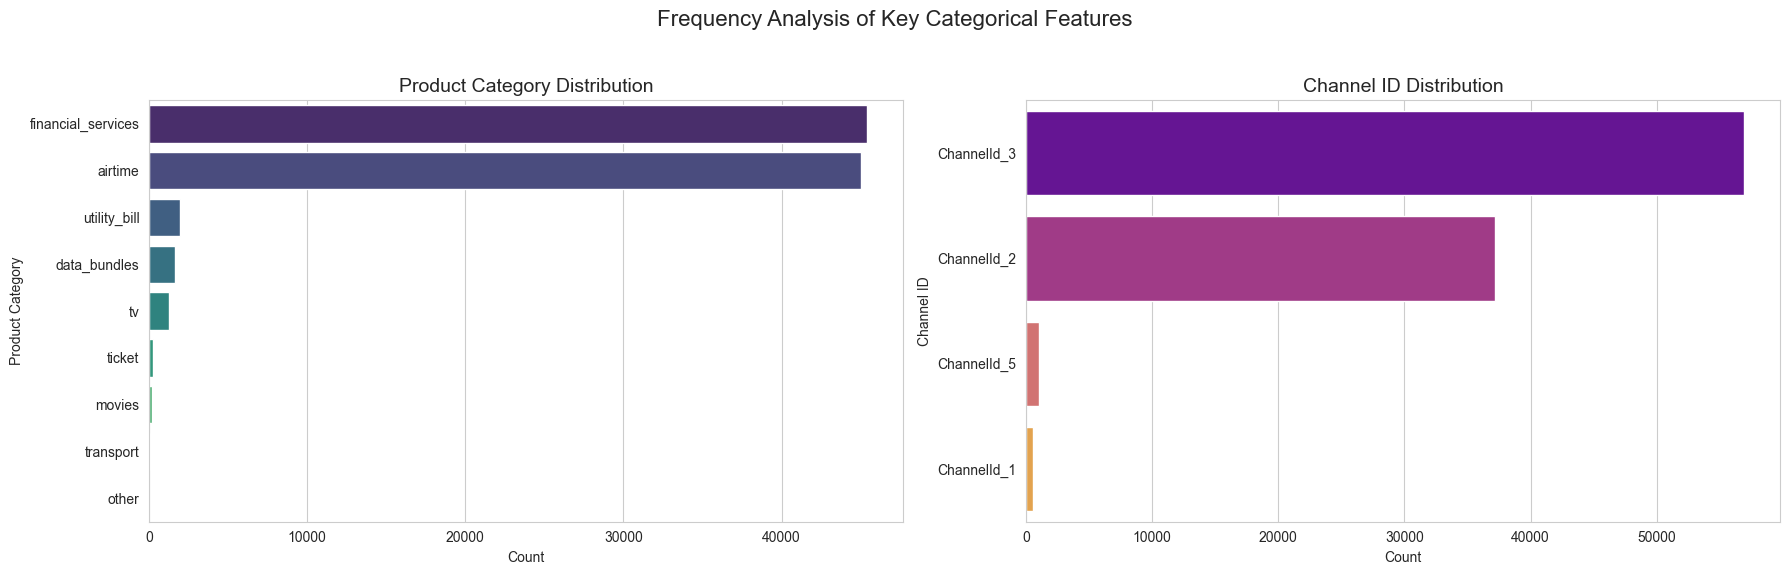

In [8]:
# Analysis of Categorical Features

# Select the two primary categorical features for visualization
categorical_features = ['ProductCategory', 'ChannelId']

fig, axes = plt.subplots(1, 2, figsize=(18, 6))
fig.suptitle('Frequency Analysis of Key Categorical Features', fontsize=16)

# Plot 1: ProductCategory
sns.countplot(y=df['ProductCategory'], order=df['ProductCategory'].value_counts().index, ax=axes[0], palette='viridis')
axes[0].set_title('Product Category Distribution', fontsize=14)
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Product Category')

# Plot 2: ChannelId
sns.countplot(y=df['ChannelId'], order=df['ChannelId'].value_counts().index, ax=axes[1], palette='plasma')
axes[1].set_title('Channel ID Distribution', fontsize=14)
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Channel ID')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

--- Correlation Matrix ---
               Amount     Value  FraudResult
Amount       1.000000  0.989692     0.557370
Value        0.989692  1.000000     0.566739
FraudResult  0.557370  0.566739     1.000000


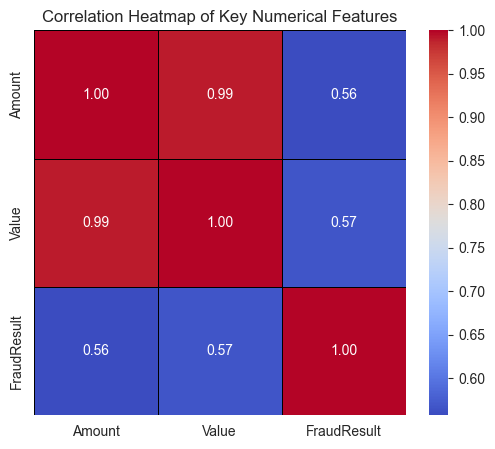

In [9]:
#  Correlation Analysis of Numerical Features

# Select the truly numerical features (excluding IDs and the categorical PricingStrategy)
numerical_for_corr = ['Amount', 'Value', 'FraudResult']

# Calculate the correlation matrix
correlation_matrix = df[numerical_for_corr].corr()

print("--- Correlation Matrix ---")
print(correlation_matrix)

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, linecolor='black')
plt.title('Correlation Heatmap of Key Numerical Features')
plt.show()

In [10]:
#  Identify Missing Values

print("--- Missing Value Count per Column ---")
missing_values = df.isnull().sum()
print(missing_values)

print("\n--- Percentage of Missing Values ---")
missing_percent = (df.isnull().sum() / len(df)) * 100
print(missing_percent[missing_percent > 0].sort_values(ascending=False))

--- Missing Value Count per Column ---
TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64

--- Percentage of Missing Values ---
Series([], dtype: float64)


## 🛑 EDA Summary: Top 5 Insights for Feature Engineering

Based on the Exploratory Data Analysis, the following are the top 5 critical findings that must be addressed in the subsequent Feature Engineering and Modeling stages:

1.  **Extreme Target Imbalance (Modeling Issue):** The target variable, FraudResult, is highly imbalanced, with only 0.2% of transactions labeled as fraud. This necessitates the use of specialized techniques like SMOTE, class weights, or focused undersampling during modeling.
2.  **Severe Data Quality Issue in Amount (Cleaning Priority):** The Amount feature contains anomalous negative transactions (min value of -1,000,000.0), which are physically nonsensical for most transaction types. These transactions must be thoroughly investigated and handled (corrected or filtered) to maintain data integrity.
3.  **High Multicollinearity and Redundancy (Feature Dropping):** Amount and Value are nearly perfectly correlated (0.99), meaning one should be dropped to avoid multicollinearity. Furthermore, CurrencyCode is a constant feature and must also be dropped.
4.  **Critical Time Feature Engineering (Feature Creation):** The TransactionStartTime must be converted to datetime and used to extract valuable temporal features (e.g., transaction hour, day of week, and velocity features) as fraud patterns are often highly time-dependent.
5.  **Categorical Features Require Grouping (Feature Encoding):** Key categorical features (ProductCategory, ChannelId) exhibit highly skewed distributions with many low-frequency categories. These sparse categories must be grouped into an 'Other' category to improve model robustness and prevent overfitting.